# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [3]:
!pip install pytorch_lightning torchmetrics wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 796 kB 5.1 MB/s 
     |████████████████████████████████| 529 kB 55.1 MB/s 
     |████████████████████████████████| 1.9 MB 49.6 MB/s 
     |████████████████████████████████| 136 kB 74.1 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 166 kB 59.8 MB/s 
     |████████████████████████████████| 182 kB 61.2 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 166 kB 66.2 MB/s 
     |████████████████████████████████| 162 kB 64.8 MB/s 
     |████████████████████████████████| 162 kB 68.0 MB/s 
     |████████████████████████████████| 158 kB 60.8 MB/s 
     |████████████████████████████████| 157 kB 50.3 MB/s 
     |████████████████████████████████| 157 kB 61.4 MB/s 
     |████████████████████████████████| 157 kB 67.9 MB/s 
     |██████████████████████████████

In [4]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
import PIL
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

In [6]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.mps.deterministic = True
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [7]:
!wget "https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1" -O dataset.zip && unzip -q dataset.zip

--2022-11-08 19:37:43--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-08 19:37:43--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee7ecb1c567c3e0342b66e6d3f.dl.dropboxusercontent.com/cd/0/get/BwagDt0wM3iN_cGxMgsGJuFO2D0mGBUYyaP_ZLbK--f2duQfTYco3QkipPL2mqZIeGJsHZ5AKtc42LgUQbHEfxnr-80QiXArmwYTQHC2vJ61ngGyztMUkWcI50Q1gT_RwOyCu2XcQ8vMZh3tLHn6t9X3rYAtyRLALo0aneBZ2hfOnw/file?dl=1# [following]
--2022-11-08 19:37:44--  https://ucee7ecb1c567c3e0342b66e6d3f.dl.dropboxusercontent.com/cd/0/get/BwagDt0wM3iN_cGxMgsGJuFO2D0mGBUYyaP_ZLbK--f2duQfTYco3QkipPL2mqZIeGJsHZ5AKtc42LgUQ

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [8]:
from os import cpu_count

train_transform = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.4511, 0.4196, 0.3723), (0.2802, 0.2709, 0.2780))
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.4511, 0.4196, 0.3723), (0.2802, 0.2709, 0.2780))
    ]
)

train_dataset = ImageFolder('./dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('./dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=cpu_count()
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=cpu_count()
)

In [9]:
# https://towardsdatascience.com/how-to-calculate-the-mean-and-standard-deviation-normalizing-datasets-in-pytorch-704bd7d05f4c
def get_mean_and_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in dataloader:
        # Mean over batch, height and width, but not over the channels
        channels_sum += torch.mean(data, dim=[0, 2, 3])
        channels_squared_sum += torch.mean(data ** 2, dim=[0, 2, 3])
        num_batches += 1

    mean = channels_sum / num_batches

    # std = sqrt(E[X^2] - (E[X])^2)
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std

# get_mean_and_std(train_dataloader)

In [10]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

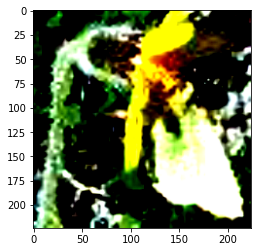

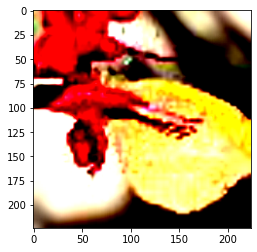

In [11]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[15].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Тренировочный класс lightning

In [12]:
class YourModule(pl.LightningModule):
    def __init__(self, model, config: dict):
        super().__init__()
        self.model = model
        self.loss = nn.CrossEntropyLoss()

        self.config = config
        self.save_hyperparameters("config")

        self.pretrained = config["pretrained"]
        if self.pretrained:
            num_features = self.model.fc.in_features
            self.model.fc = nn.Identity()
            if config["feature_extraction"]:
                for param in self.model.parameters():
                    param.requires_grad = False
            self.classifier = nn.Linear(in_features=num_features, out_features=200)
            self.optimizer = torch.optim.Adam(self.classifier.parameters(),
                                              lr=config['learning_rate'],
                                              weight_decay=config['weight_decay'])
        else:
            self.optimizer = torch.optim.Adam(self.model.parameters(),
                                              lr=config['learning_rate'],
                                              weight_decay=config['weight_decay'])
        self.scheduler = torch.optim.lr_scheduler.ExponentialLR(self.optimizer, gamma=config['gamma'])

    def forward(self, x):
        if self.pretrained:
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("train_loss", loss, prog_bar=False)
        self.log("train_acc", acc, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=False)
        self.log("val_acc", acc, prog_bar=True)

In [13]:
device = "cuda" if torch.cuda.is_available() else (
    "mps" if torch.backends.mps.is_available() else "cpu")

In [14]:
from pytorch_lightning.callbacks import LearningRateMonitor, EarlyStopping, ModelCheckpoint

seed_everything(43)

config = {
    "model": "ResNet18",
    "pretrained": True,
    "feature_extraction": True,
    "train_transform": str(train_transform),
    "device": device,
    "learning_rate": 0.001,
    "weight_decay": 0.0001,
    "gamma": 0.9
}

wandb_logger = WandbLogger(project="Homework 2 – Image Classification",
                           name="task2_resnet50",
                           log_model="all")  # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V2).to(device)
module = YourModule(model, config)

trainer = pl.Trainer(accelerator=device,
                     logger=wandb_logger,
                     max_epochs=25,
                     callbacks=[LearningRateMonitor(logging_interval='epoch'),
                                # ModelCheckpoint(monitor="val_acc", mode="max"),
                                EarlyStopping(monitor='val_acc', mode='max',
                                              patience=3,
                                              min_delta=0.01,
                                              stopping_threshold=0.84)])
trainer.fit(module, train_dataloader, val_dataloader)  # YOUR CODE HERE
wandb.finish()

wandb: Currently logged in as: drunkvermicelli. Use `wandb login --relogin` to force relogin


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params
------------------------------------------------
0 | model      | ResNet           | 23.5 M
1 | loss       | CrossEntropyLoss | 0     
2 | classifier | Linear           | 409 K 
------------------------------------------------
409 K     Trainable params
23.5 M    Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


epoch,▁▁▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆█
lr-Adam,█▆▄▂▁
train_acc,▁▄▄▅▆▅▆▆▆▆▆▇▆▇▅▆▇▆▅▇▆▆▇▆██▇▇▆▆█▅▅▆██▆▇▇▇
train_loss,█▆▅▄▃▄▃▃▃▃▂▂▂▂▃▃▂▃▃▂▂▂▃▂▁▁▂▂▂▃▁▃▂▃▁▁▂▂▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
val_acc,▁▅▇█
val_loss,█▃▁▁
epoch,4
lr-Adam,0.00066
train_acc,0.64062
train_loss,1.42507


In [15]:
wandb.finish()

### Валидация результатов задания

In [16]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    acc = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            preds = model(images).to(device)
            acc_batch = accuracy(preds, labels)
        acc += acc_batch
    acc = acc / len(test_dataloader)
    return acc

In [20]:
train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

train_dataset = ImageFolder('./dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('./dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=cpu_count()
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=cpu_count()
)


run = wandb.init()
artifact = run.use_artifact('drunkvermicelli/Homework 2 – Image Classification/model-1dr491mp:v12', type='model')
artifact_dir = artifact.download()

model = YourModule.load_from_checkpoint(checkpoint_path=artifact_dir + "/model.ckpt",
                                        model=torchvision.models.resnet18(weights=None))

acc = evaluate_task(model, val_dataloader, device)
print(f"Оценка за это задание составит {np.clip(10 * acc.cpu() / 0.44, 0, 10):.2f} баллов")

wandb: Downloading large artifact model-1dr491mp:v12, 133.91MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:2.4

100%|██████████| 157/157 [00:06<00:00, 24.56it/s]

Оценка за это задание составит 9.46 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

In [21]:
train_transform = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize((0.4511, 0.4196, 0.3723), (0.2802, 0.2709, 0.2780))
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.4511, 0.4196, 0.3723), (0.2802, 0.2709, 0.2780))
    ]
)

train_dataset = ImageFolder('./dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('./dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=cpu_count()
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=64,
    shuffle=False,
    num_workers=cpu_count()
)

run = wandb.init()
artifact = run.use_artifact('drunkvermicelli/Homework 2 – Image Classification/model-1pmk3sii:v3', type='model')
artifact_dir = artifact.download()

model = YourModule.load_from_checkpoint(checkpoint_path=artifact_dir + "/model.ckpt",
                                        model=torchvision.models.resnet50(weights=None))

acc = evaluate_task(model, val_dataloader, device)
print(f"Оценка за это задание составит {np.clip(10 * (acc.cpu() - 0.5) / 0.34, 0, 10):.2f} баллов")

wandb: Downloading large artifact model-1pmk3sii:v1, 94.68MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.1

100%|██████████| 157/157 [00:38<00:00,  4.03it/s]

Оценка за это задание составит 4.25 баллов


# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

https://wandb.ai/drunkvermicelli/Homework%202%20%E2%80%93%20Image%20Classification/reports/Homework-2-Image-Classification--VmlldzoyOTM0OTIw